## Introduction
This notebook demoes the gdgtm workflow, from gathering a collection of rasters, through their alignment and matching.

In the course of the demo we will:
1. Download a Raster from Chelsa and set it up as our Master Geotiff.
2. Download multiple rasters from OSM data sets
3. Align those rasters with the Chelsa data

In [1]:
import gdgtm
import os
import rasterio
import matplotlib.pyplot as plt

/home/pete/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Get a raster from Chelsa and transform it

#### get_chelsa_data

In [2]:
parameter = "tas"
extent = [5.7663, 10.5532, 47.9163, 45.6755]
start_date = "2023-1-1"
end_date = "2023-1-5"

gdgtm.get_chelsa_data(parameter, extent, start_date, end_date, 
                      write_location = '/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/chelsa_tas_raw.tif')


Driver: GTiff/GeoTIFF
Files: none associated
Size is 43200, 20880
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-180.000138888850017,83.999860415150010)
Pixel Size = (0.008333333300000,-0.008333333300000)
Metadata:
  activity_id=observation
  AREA_OR_POINT=Area
  cf_standard_name=air_temperature
  citation1=Karger, D.N., Conrad, O., Böhner, J., Kawohl, T., Kreft, H., Soria-Auza, R.W., Zimmermann, N.E., Linder, P., Kessler, M. (2017). Climatologies at high resolution fo

'Target .tiff exists'

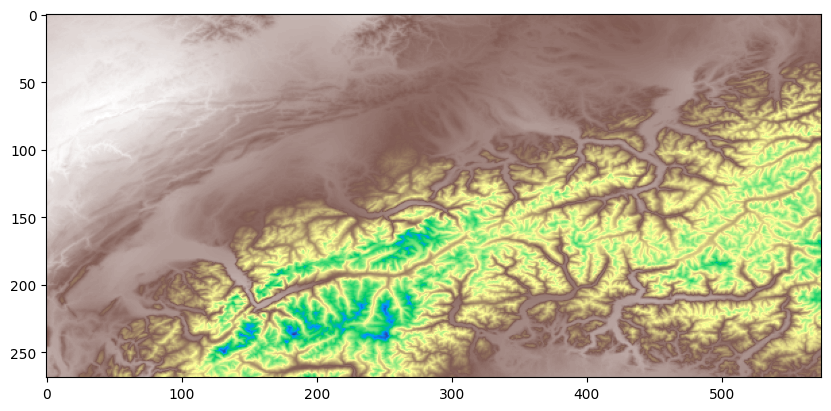

In [3]:
with rasterio.open("/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/chelsa_tas_raw.tif") as target:
    target_data = target.read()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(target_data[0], cmap='terrain') # For single-band raster
    # plt.imshow(data.transpose(1, 2, 0)) # For multi-band raster
    plt.show()

#### Reproject raster

In [4]:
gdgtm.reproject_raster(new_crs = "ESRI:54028", 
                       source_raster = '/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/chelsa_tas_raw.tif',
                       dst_raster = '/home/pete/Documents/tests_and_vals/gdgtm/02_master_reprojected/chelsa_tas_reprojected.tif'
                      )

print("Source file retained: " + str(os.path.exists("/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/chelsa_tas_raw.tif")))


Reprojection successful
Source file retained: False


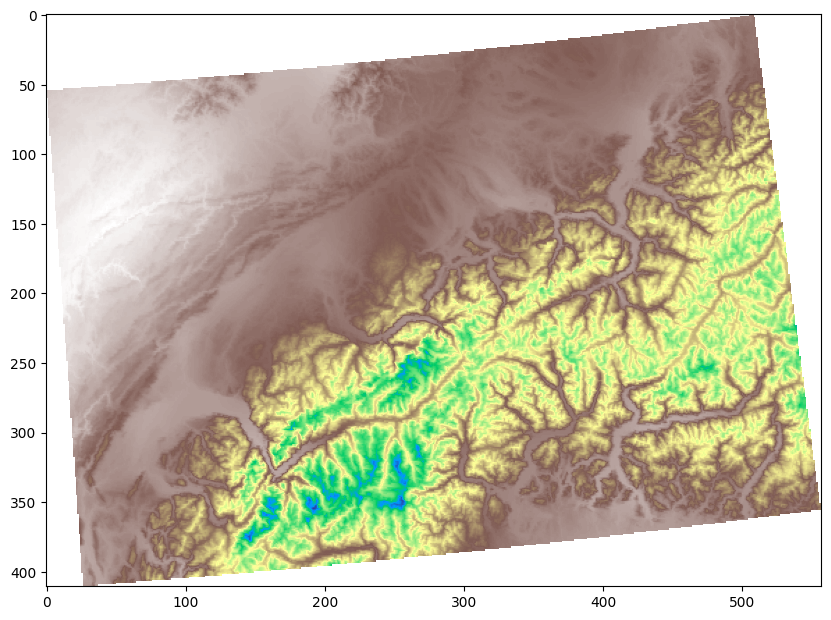

In [5]:
with rasterio.open("/home/pete/Documents/tests_and_vals/gdgtm/02_master_reprojected/chelsa_tas_reprojected.tif") as target:
    target_data = target.read()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(target_data[0], cmap='terrain') # For single-band raster
    # plt.imshow(data.transpose(1, 2, 0)) # For multi-band raster
    plt.show()

#### change_raster_res

In [6]:
gdgtm.change_raster_res(target_res = 500,
                        source_raster = '/home/pete/Documents/tests_and_vals/gdgtm/02_master_reprojected/chelsa_tas_reprojected.tif',
                        dst_raster = '/home/pete/Documents/tests_and_vals/gdgtm/03_master_rescaled/chelsa_tas_rescaled.tif',
                       )

print("Source file retained: " + str(os.path.exists('/home/pete/Documents/tests_and_vals/gdgtm/02_ master_reprojected/chelsa_tas_reprojected.tif')))

Resolution change successful: new pixel size matches target
Source file retained: False


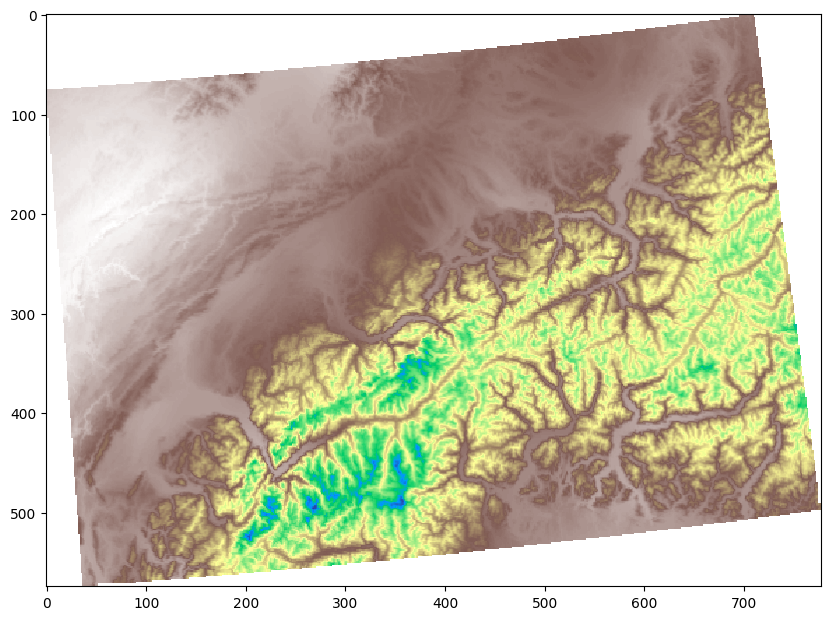

In [7]:
with rasterio.open("/home/pete/Documents/tests_and_vals/gdgtm/03_master_rescaled/chelsa_tas_rescaled.tif") as target:
    target_data = target.read()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(target_data[0], cmap='terrain') # For single-band raster
    # plt.imshow(data.transpose(1, 2, 0)) # For multi-band raster
    plt.show()

#### set_raster_boundbox()

In [8]:
new_bb = [515000, 5100000, 700000, 5350000]
gdgtm.set_raster_boundbox(target_bb = new_bb,
                          source_raster = "/home/pete/Documents/tests_and_vals/gdgtm/03_master_rescaled/chelsa_tas_rescaled.tif",
                          dst_raster = '/home/pete/Documents/tests_and_vals/gdgtm/04_master_rebound/chelsa_tas_rebound.tif',
                         )

print("Source file retained: " + str(os.path.exists('/home/pete/Documents/tests_and_vals/gdgtm/03_master_rescaled/chelsa_tas_rescaled.tif')))


Setting new bounding box successful: errors relative to target < 0.01
Source file retained: False


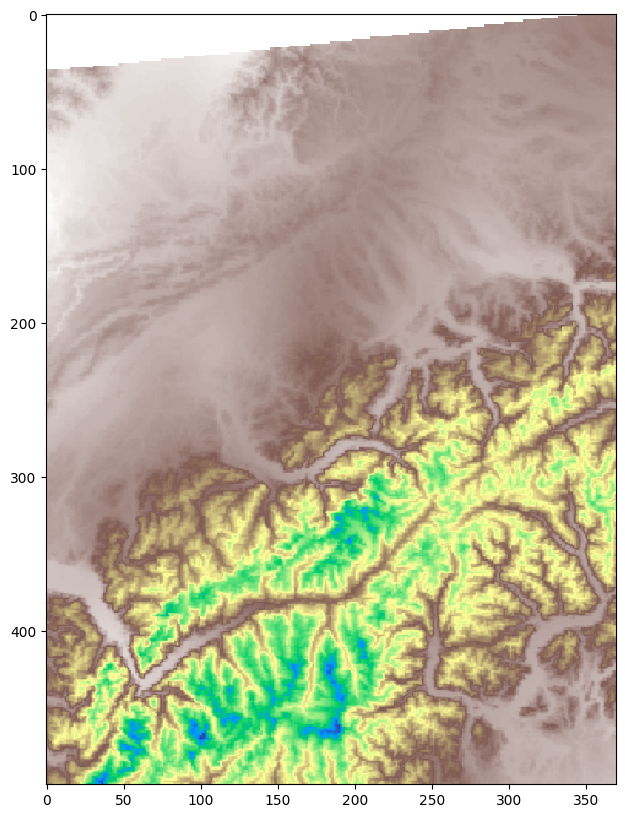

In [9]:
with rasterio.open("/home/pete/Documents/tests_and_vals/gdgtm/04_master_rebound/chelsa_tas_rebound.tif") as target:
    target_data = target.read()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(target_data[0], cmap='terrain') # For single-band raster
    # plt.imshow(data.transpose(1, 2, 0)) # For multi-band raster
    plt.show()

### Get OLM rasters

#### get_cognames_from_stac_coll_static

In [10]:
hum_foot_url = gdgtm.get_cognames_from_stac_coll_static("https://s3.eu-central-1.wasabisys.com/stac/openlandmap/wilderness_li2022.human.footprint/collection.json")

In [11]:
alc_url = gdgtm.get_cognames_from_stac_coll_static("https://s3.eu-central-1.wasabisys.com/stac/openlandmap/land.cover_esacci.lc.l4/collection.json")


#### get_cogs_from_olm

In [24]:
bbox = (5.7663, 47.9163, 10.5532, 45.6755)

gdgtm.get_cogs_from_olm(cognames = hum_foot_url, 
                        target_directory = "/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/", 
                        target_names = "olm_humfoot_switz_raw_",
                        bbox = bbox,
                        interval = ("20020601", "20050101")
                       )

gdgtm.get_cogs_from_olm(cognames = alc_url, 
                        target_directory = "/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/", 
                        target_names = "olm_alc_switz_raw_",
                        bbox = bbox,
                        date_start = ("20020601", "20050101")
                       )

/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_humfoot_switz_raw_20030101.tif
/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_humfoot_switz_raw_20040101.tif
/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_alc_switz_raw_20030101.tif
/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_alc_switz_raw_20040101.tif


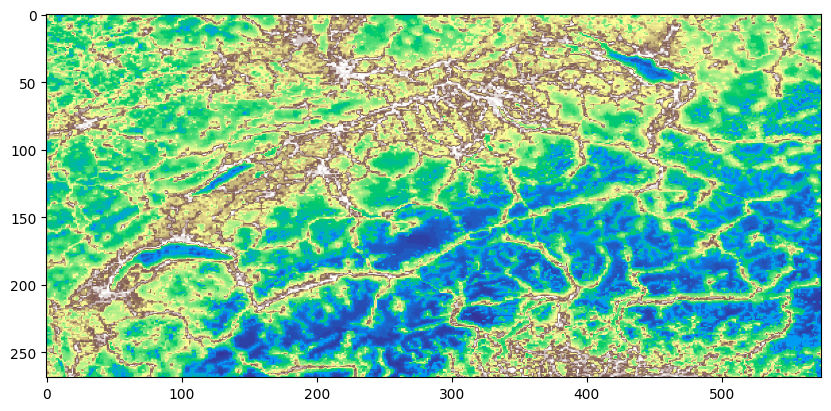

In [25]:
with rasterio.open("/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_humfoot_switz_raw_20030101.tif") as target:
    target_data = target.read()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(target_data[0], cmap='terrain') # For single-band raster
    # plt.imshow(data.transpose(1, 2, 0)) # For multi-band raster
    plt.show()

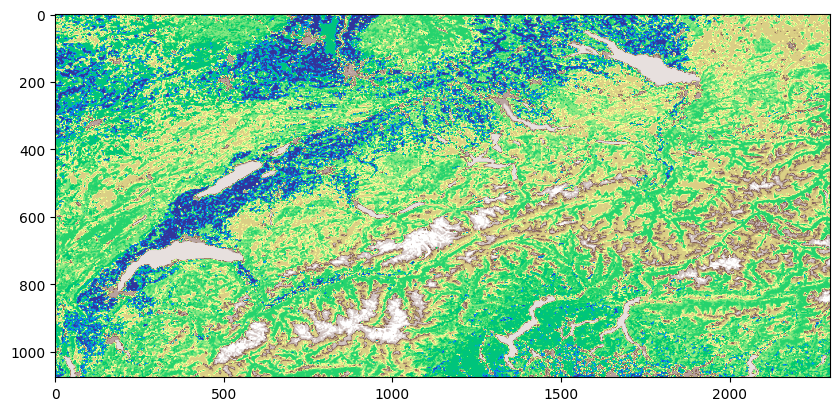

In [27]:
with rasterio.open("/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_alc_switz_raw_20030101.tif") as target:
    target_data = target.read()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(target_data[0], cmap='terrain') # For single-band raster
    # plt.imshow(data.transpose(1, 2, 0)) # For multi-band raster
    plt.show()

Reprojection successful
{'dimension_match': True, 'projection_match': True, 'pixel_count_match': True, 'geotransform_match': True}
Source file retained: False


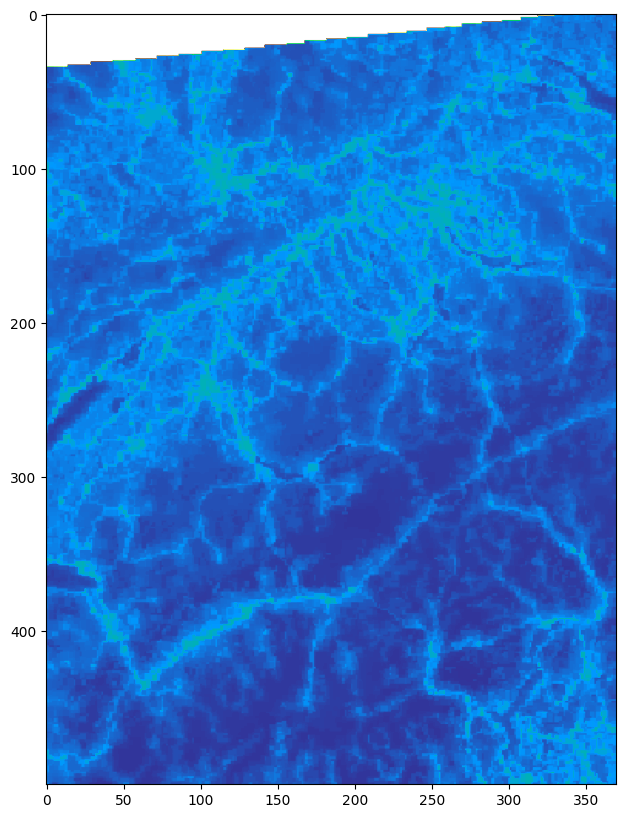

Reprojection successful
{'dimension_match': True, 'projection_match': True, 'pixel_count_match': True, 'geotransform_match': True}
Source file retained: False


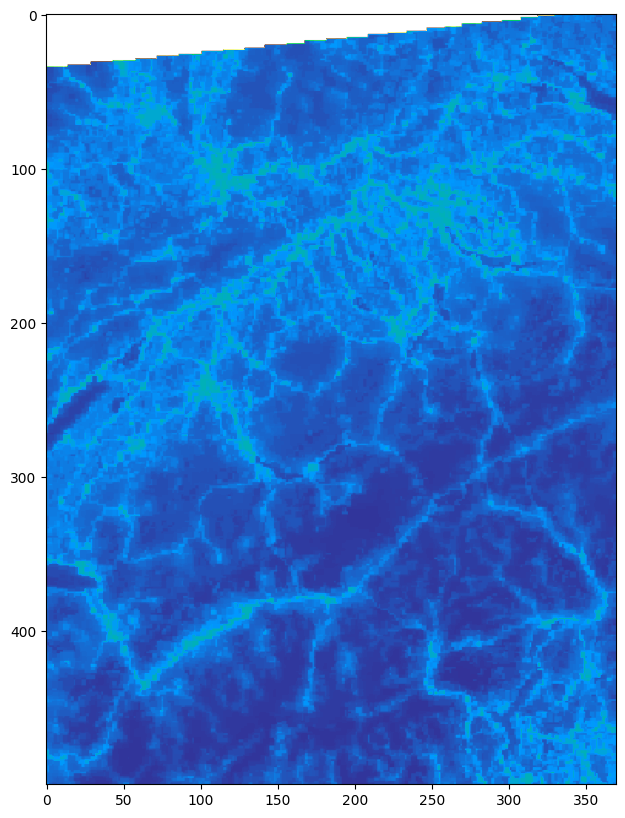

Reprojection successful
{'dimension_match': True, 'projection_match': True, 'pixel_count_match': True, 'geotransform_match': True}
Source file retained: False


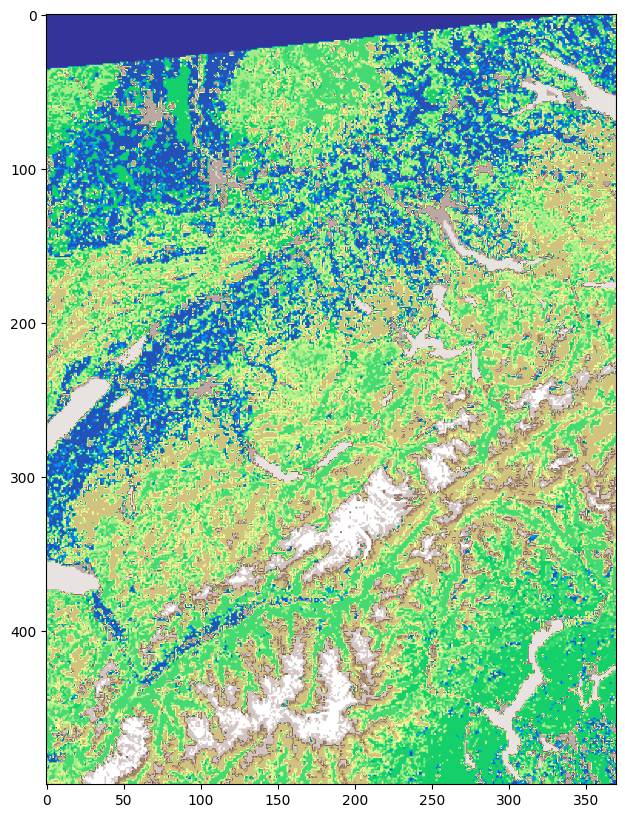

Reprojection successful
{'dimension_match': True, 'projection_match': True, 'pixel_count_match': True, 'geotransform_match': True}
Source file retained: False


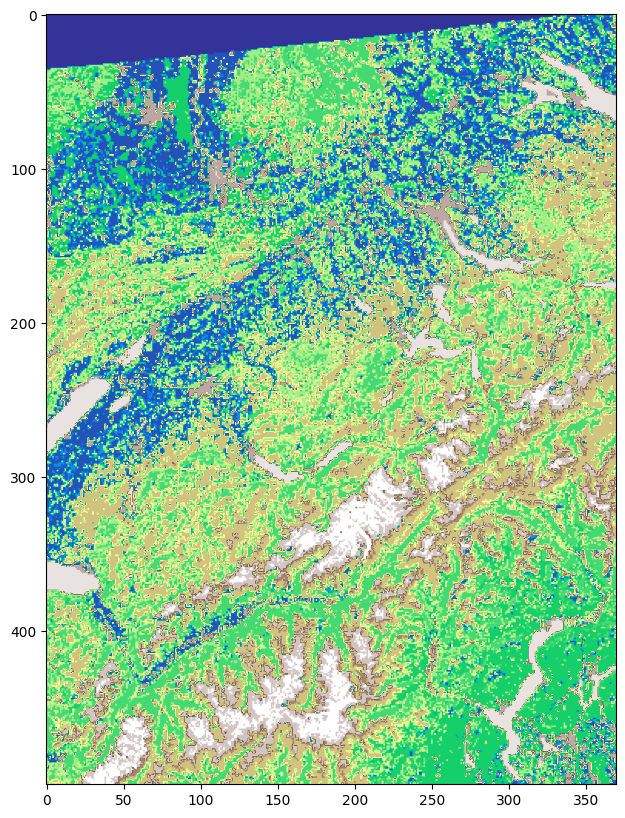

In [28]:
rasters_to_process = [["/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_humfoot_switz_raw_20030101.tif",
                      "/home/pete/Documents/tests_and_vals/gdgtm/05_supplements_aligned/olm_humfoot_switz_align_20030101.tif"],
                      ["/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_humfoot_switz_raw_20040101.tif",
                      "/home/pete/Documents/tests_and_vals/gdgtm/05_supplements_aligned/olm_humfoot_switz_align_20040101.tif"],
                      ["/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_alc_switz_raw_20030101.tif",
                      "/home/pete/Documents/tests_and_vals/gdgtm/05_supplements_aligned/olm_alc_switz_align_20030101.tif"],
                      ["/home/pete/Documents/tests_and_vals/gdgtm/01_get_functions/olm_alc_switz_raw_20040101.tif",
                      "/home/pete/Documents/tests_and_vals/gdgtm/05_supplements_aligned/olm_alc_switz_align_20040101.tif"]]




for raster in rasters_to_process:
    outcome = gdgtm.align_validate_raster(source_raster = raster[0],
                                          target_raster = "/home/pete/Documents/tests_and_vals/gdgtm/04_master_rebound/chelsa_tas_rebound.tif",
                                          dst_raster = raster[1])

    print(outcome)
    print("Source file retained: " + str(os.path.exists(raster[0])))
    with rasterio.open(raster[1]) as target:
        target_data = target.read()
    
        plt.figure(figsize=(10, 10))
        plt.imshow(target_data[0], cmap='terrain') # For single-band raster
        # plt.imshow(data.transpose(1, 2, 0)) # For multi-band raster
        plt.show()